In [423]:
import numpy as np
import pandas as pd

In [424]:
experimentA = pd.read_csv("Survey_A.csv")

In [425]:
experimentA.head()

,Gender,Age,Race,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequance1,Sequance2,Sequance3,Sequance4,Sequance5,Sequance6,Notes
0,Male,20,Asian or Pacific Islander,No,Yes,Yes,5,Higher,Lower,Higher,Higher,Higher,Lower,Higher,NaN
1,Male,20,Asian or Pacific Islander,No,Yes,Yes,14,Higher,Higher,Lower,Higher,Higher,Higher,Higher,NaN
2,Female,20,Asian or Pacific Islander,No,Yes,Yes,15,Higher,Higher,Lower,Higher,Higher,Same,Lower,NaN
3,Male,20,White,No,Yes,No,0,Lower,Lower,Lower,Lower,Lower,Lower,Lower,NaN
4,Female,20,Asian or Pacific Islander,No,Yes,Yes,10,Higher,Lower,Lower,Higher,Higher,Lower,Lower,NaN


# Part 1: Exploratory Data Analysis

## Data Cleaning

In this experiment, participants were given a two note sequance and asked to rate whether the second note was a higher or lower pitch than the first note. This sequance was D, D#, with the correct anwser being HIGHER as D# is higher than D. Participants that failed this inital test are excluded from the analysis.

In [426]:
experimentA = experimentA[experimentA['Control'] == "Higher"]


For ease of future data analysis, the participant responses are marked as incorrect or correct.

In [427]:
experimentA.loc[(experimentA.Sequance1 != 'Higher'),'Sequance1']='Incorrect'
experimentA.loc[(experimentA.Sequance1 == 'Higher'),'Sequance1']='Correct'

experimentA.loc[(experimentA.Sequance2 != 'Lower'),'Sequance2']='Incorrect'
experimentA.loc[(experimentA.Sequance2 == 'Lower'),'Sequance2']='Correct'

experimentA.loc[(experimentA.Sequance3 != 'Higher'),'Sequance3']='Incorrect'
experimentA.loc[(experimentA.Sequance3 == 'Higher'),'Sequance3']='Correct'

experimentA.loc[(experimentA.Sequance4 != 'Higher'),'Sequance4']='Incorrect'
experimentA.loc[(experimentA.Sequance4 == 'Higher'),'Sequance4']='Correct'

experimentA.loc[(experimentA.Sequance5 != 'Higher'),'Sequance5']='Incorrect'
experimentA.loc[(experimentA.Sequance5 == 'Higher'),'Sequance5']='Correct'

experimentA.loc[(experimentA.Sequance6 != 'Lower'),'Sequance6']='Incorrect'
experimentA.loc[(experimentA.Sequance6 == 'Lower'),'Sequance6']='Correct'



experimentA.head()

,Gender,Age,Race,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequance1,Sequance2,Sequance3,Sequance4,Sequance5,Sequance6,Notes
0,Male,20,Asian or Pacific Islander,No,Yes,Yes,5,Higher,Incorrect,Incorrect,Correct,Correct,Incorrect,Incorrect,NaN
1,Male,20,Asian or Pacific Islander,No,Yes,Yes,14,Higher,Correct,Correct,Correct,Correct,Correct,Incorrect,NaN
2,Female,20,Asian or Pacific Islander,No,Yes,Yes,15,Higher,Correct,Correct,Correct,Correct,Incorrect,Correct,NaN
4,Female,20,Asian or Pacific Islander,No,Yes,Yes,10,Higher,Incorrect,Correct,Correct,Correct,Incorrect,Correct,NaN
5,Male,17,Asian or Pacific Islander,No,Yes,Yes,3,Higher,Incorrect,Correct,Incorrect,Correct,Correct,Correct,NaN


## Looking at the Big Picture

### Demographical Snapshot

Participants are first split up based on demographical data in order to surface up any abnormalities that would warrant future individual investigation. This also gives us a good picture/snapshot of the underlying distribution we are looking at. 



#### Male

In [428]:
experimentA_Male = experimentA[experimentA['Gender'] == "Male"]


In [429]:
#Number of Particpants
experimentA_Male.shape[0]

15

In [430]:
#Average Age
experimentA_Male[['Age']].mean()

Age    20.333333
dtype: float64

In [431]:
#Average Years of Musical Training
experimentA_Male[['Years']].mean()

Years    5.4
dtype: float64

#### Female

In [432]:
experimentA_Female = experimentA[experimentA['Gender'] == "Female"]

In [433]:
#Number of Particpants
experimentA_Female.shape[0]

11

In [434]:
#Average Age
experimentA_Female[['Age']].mean()

Age    20.636364
dtype: float64

In [435]:
#Average Years of Musical Training
experimentA_Female[['Years']].mean()

Years    8.727273
dtype: float64

#### Decline to state

In [436]:
experimentA_decline = experimentA[experimentA['Gender'] == "Prefer not to say"]

In [437]:
experimentA_decline.shape[0]

1

### Music Background Snapshot

A participant's music background is looked at. In the sample, nearly all participants reported listening to music regularly, and many have played an instrument.

#### Listened to Music?

In [438]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentA[experimentA['Listen_Music'] == "Yes"].shape[0]/experimentA.shape[0]

0.9629629629629629

#### Played an instrument? FIX SPELLING

In [439]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentA[experimentA['Played_Instruement'] == "Yes"].shape[0]/experimentA.shape[0]

0.8518518518518519

#### Average Years of Musical training (all samples)

In [440]:
experimentA[["Years"]].mean()

Years    7.333333
dtype: float64

## Looking at the Big Picture Conclusions (After data cleaning):
- The number of participants were 30 in total orignally, 3 participants were removed due to failing the control sequence.
- 15 male, 11 female, and 1 decline to state was the demographical breakup by gender. The average age was 20 and average years of musical training was 7 years.
- Almost all participants listen to music regularily (96%) and most played an instrument or had musical training at some point in their life (85%). 


## Correctness Snapshot

The proportion of correct versus incorrect responses are now looked at for each musical sequance that was played. 
A graph depicting these results are displayed. Overall Correct: 53%

### Sequance 1 (Late):
##### 33% correctly identified the pitch
C F D D# F F# C# F D C# (C# HIGHER than C)

In [441]:
#Male
experimentA_Male[experimentA_Male['Sequance1'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance1'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance1_all = experimentA[experimentA['Sequance1'] == "Correct"].shape[0]/experimentA.shape[0] * 100


In [442]:
sequance1_all

33.33333333333333

### Sequance 2 (Early): 
##### 81% correctly identified the pitch

E F D D# F F# C# F D D# (D# LOWER than E)

In [443]:
#Male
experimentA_Male[experimentA_Male['Sequance2'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance2'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance2_all = experimentA[experimentA['Sequance2'] == "Correct"].shape[0]/experimentA.shape[0] * 100

In [444]:
sequance2_all

81.48148148148148

### Sequance 3 (Precise Metric Position):
##### 67% correctly identifid the pitch.
D F D D# F F# C# F D D# (D# HIGHER than D)    

In [445]:
#Male
experimentA_Male[experimentA_Male['Sequance3'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance3'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance3_all = experimentA[experimentA['Sequance3'] == "Correct"].shape[0]/experimentA.shape[0] * 100 

In [446]:
sequance3_all

66.66666666666666

### Sequance 4 (Very Early):
##### 56% correctly identified the pitch.
E F D D# F F# C# F D F (F HIGHER than E) 

In [447]:
#Male
experimentA_Male[experimentA_Male['Sequance4'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance4'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance4_all = experimentA[experimentA['Sequance4'] == "Correct"].shape[0]/experimentA.shape[0] *100 

In [448]:
sequance4_all

55.55555555555556

### Sequance 5 (Irregular Temporal Context):
##### 33% correctly identified the pitch.
D C E B E E D F E C# D# (D# HIGHER than D)

In [449]:
#Male
experimentA_Male[experimentA_Male['Sequance5'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance5'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance5_all = experimentA[experimentA['Sequance5'] == "Correct"].shape[0]/experimentA.shape[0] *100 

In [450]:
sequance5_all

33.33333333333333

### Sequance 6 (Very Late):
##### 52% correctly identified the pitch.
F F D D# F F# C# F D E (E LOWER than F) 

In [451]:
#Male
experimentA_Male[experimentA_Male['Sequance6'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance6'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance6_all = experimentA[experimentA['Sequance6'] == "Correct"].shape[0]/experimentA.shape[0] *100

In [452]:
sequance6_all

51.85185185185185

Text(0.5, 1.0, 'Graph of % correct identifying pitch vs metric position(timing)')

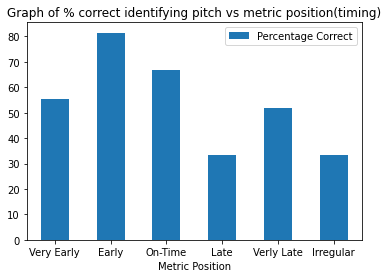

In [453]:
experimentA_all_bar = pd.DataFrame({'Metric Position':['Very Early', 'Early', 'On-Time','Late','Verly Late','Irregular'], 'Percentage Correct':[sequance4_all,sequance2_all,sequance3_all,sequance1_all,sequance6_all,sequance5_all]})
ax = experimentA_all_bar.plot.bar(x='Metric Position', y='Percentage Correct', rot=0)
ax.set_title('Graph of % correct identifying pitch vs metric position(timing)')


# Part 2 Data Analysis:


## Hypothesis (A/B) Testing:
Null: The timing of the comparison tone (the last note) relatively to the distracting tones (notes in the middle)
does not affect a participants performance in determining if the comparison tone is higher/lower/same in pitch
than than the standard tone.

In [454]:
test_statistics = []
sampling_array = np.append(experimentA["Sequance1"].array,experimentA["Sequance2"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance3"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance4"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance5"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance6"].array)




In [455]:
len(sampling_array)

162

In [456]:
def observerd_statistic_cacl(seq='Sequance3'):
    ## Returns the observered statistic, which in this case is the
    ## % correct of the specific sequance OR % correct of Sequance 3 (normal metric position)
        sequance_test = experimentA[seq].values
        percent_correct = np.count_nonzero(sequance_test=="Correct")/len(sequance_test)
        return percent_correct
    

In [457]:
def a_b_test(seq=None,general=True):
    ##Calculates the test statistic between a sequance and general distribution.
    
   
    if general != True:
        sequance_test = experimentA[seq].sample(n=experimentA.shape[0],replace=True).values
        #Pecent correct in specific sequance distribution
        unique, counts = np.unique(sequance_test, return_counts=True)
        result = dict(zip(unique, counts))
        try:
            percent_correct = result['Correct']/len(sequance_test)
        except:
            percent_correct = 0
    else:
        #Percent correct in overall distribution    
        general_test = np.random.choice(sampling_array,size=experimentA.shape[0],replace=True)
        unique1, counts1 = np.unique(general_test, return_counts=True)
        result1 = dict(zip(unique1, counts1))
        try:
            percent_correct = result1['Correct']/len(general_test)
        except:
            percent_correct= 0

    
    #Calculate test statistic
    test_statistic = percent_correct
    return np.array([test_statistic])
    


#### Sequance 1 (Late): 33% correct

C F D D# F F# C# F D C# (C# HIGHER than C)


Comparing late sequance to overall distribution (Late < Overall)

In [458]:
observed_statistic = observerd_statistic_cacl("Sequance1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(observed_statistic <= test_statistics)/1000
p_value

0.007000000000000006

Comparing late sequance to on time sequance (Late < On Time)

In [469]:
observed_statistic = observerd_statistic_cacl("Sequance1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic <= test_statistics)/1000
p_value

0.0

#### Conclusion 1:
The percentage correct seen in the late arriving note sequance is statistically significant when compared to both the overall distribution and the on-time distribution.

#### Sequance 2 (Early): 81% correct

E F D D# F F# C# F D D# (D# LOWER than E)


Comparing early sequance to overall distribution (Early > Overall)

In [460]:
observed_statistic = observerd_statistic_cacl("Sequance2")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.0

Comparing early sequance to on time sequance (Early > On Time)

In [461]:
observed_statistic = observerd_statistic_cacl("Sequance2")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.03300000000000003

#### Conclusion 2 : 
The percentage correct seen in the early arriving note sequance is statistically significant when compared to both the overall distribution and the on-time distribution.




#### Sequance 3 (Precise Metric Position): 67%

D F D D# F F# C# F D D# (D# HIGHER than D)


In [471]:
observed_statistic = observerd_statistic_cacl("Sequance3")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.049000000000000044

#### Conclusion 3 :
The percentage correct seen in the note arrving at the precise metric position is statistically significant when compared to the overall distribution.


#### Sequance 4 (Very Early): 56% correct

E F D D# F F# C# F D F (F HIGHER than E)


Comparing very early sequance to overall (About same)

In [463]:
observed_statistic = observerd_statistic_cacl("Sequance4")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.345

Comparing very early to on-time (very early < on time)



In [464]:
observed_statistic = observerd_statistic_cacl("Sequance4")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic <= test_statistics)/1000
p_value


0.07699999999999996

#### Conclusion:  4
The percentage correct is not statsitically significant in all comparisons.

#### Sequance 5 (Irregular Temporal Context): 33% correct

D C E B E E D F E C# D# (D# HIGHER than D)


Comparing irregular to general (irregular < general)

In [465]:
observed_statistic = observerd_statistic_cacl("Sequance5")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(observed_statistic <= test_statistics )/1000
p_value

0.0050000000000000044

In [466]:
observed_statistic = observerd_statistic_cacl("Sequance5")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3",False)))
    
p_value = 1 - np.count_nonzero( observed_statistic <= test_statistics )/1000
p_value

0.0

#### Conclusion 5:
The percentage correct is statistically signiciant in all comparisons.

#### Sequance 6 (Very Late): 52% correct

F F D D# F F# C# F D E (E LOWER than F)


Comparing very late to general (about same)

In [467]:
observed_statistic = observerd_statistic_cacl("Sequance6")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1-  np.count_nonzero(observed_statistic < test_statistics)/1000
p_value

0.514

Comparing very late to on time (very late < on time)

In [468]:
observed_statistic = observerd_statistic_cacl("Sequance6")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3",False)))
    
p_value =  1 - np.count_nonzero(observed_statistic < test_statistics )/1000
p_value

0.06599999999999995

#### Conclusion: 6
The percentage correct is not statistically significant in all comparisons.